t-test는 검정통계량이 귀무가설이 참일 때 t-분포를 따르는 경우 사용하는 통계적 가설검정 기법

특정 집단의 평균 값을 추정하거나 평균 차이를 검정

종속변수는 평균을 가질 수 있는 연속형

독립변수는 성별,종교,부서와 같은 범주형

예제) A의 집단과 B 집단에서 표본을 추출하고 몸무게의 평균 차이를 비교하였을 때 2kg의 차이가 났다. 이 몸무게의 차이는 두 집단의 몸무게가 차이가 난다고 할 수 있을까?

표본이 1개이면 $t=\frac{(\bar{x} - \mu )}{\frac{s}{\sqrt{n}}}$

표본이 2개이면 $t=\frac{(\bar{X}_{1} - \bar{X}_{2})}{\sqrt{\frac{(N_{1}-1)S_{1}+(N_{2}-1)S_{2}}{N_{1}+N_{2}-2}\times [\frac{1}{N_{1}}+\frac{1}{N_{2}}]}}$

#일표본 t검정

단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교

가정: 집단의 구성요소들이 정규분포를 따른다

단계


1.   가설 수립

귀무가설(H0): 모평균의 값은 **이다

대립가설(H1): 모평균의 값은 **이 아니다.

2.   유의수준 설정

기본적으로 0.05

3. 정규성 검정

데이터가 정규분포를 따르는가?

정규분포를 따른다고 할 수 있으면 T-test

그렇지 않다면 윌콕슨의 부호순위 검정

4. 검정통계량 계산, p-value 계산

선택한 t-test나 윌콕슨 부호순위 검정의 검정통계량, p-value계산

5. 귀무가설 기각여부 판단, 해석



예제

In [ ]:
#data load

import pandas as pd

cats = pd.read_csv('/content/drive/MyDrive/adpdata/cats.csv')

cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [ ]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


고양이들의 평균 몸무게가 2.6kg인지 아닌지 통계적 검정 수행

정규성 검정

from scipy.stats import shapiro

귀무가설(H0): 정규분포를 따른다

대립가설(H1): 정규분포를 따르지 않는다

In [ ]:
import scipy.stats as stats

from scipy.stats import shapiro

mu = 2.6

shapiro(cats['Bwt']) #test_statistic, p-value

(0.9518786668777466, 6.730248423991725e-05)

p-value가 유의수준보다 충분히 작으므로 귀무가설을 기각하고 cats['Bwt']는 정규분포를 따르지 않는다

데이터가 정규분포를 따르지 않으므로 윌콕슨 부호순위 검정 수행

In [ ]:
stats.wilcoxon(cats.Bwt-mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

참고로 정규분포를 따른다면 stats.ttest_1samp()함수 사용

In [ ]:
stats.ttest_1samp(cats.Bwt,popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

시각화를 통해 데이터 분포를 확인

Text(0, 0.5, 'Count')

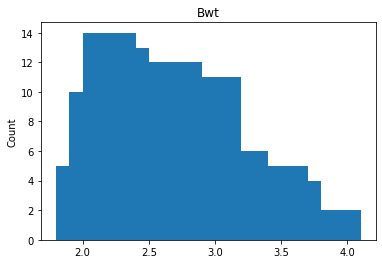

In [ ]:
import matplotlib.pyplot as plt

cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)

width = 0.4

plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)

plt.title('Bwt')
plt.ylabel('Count')

시각화한 그래프에서 데이터가 정규분포를 따른다고 보기 어렵다

윌콕슨 부호순위 검정으로 p-value가 유의수준보다 충분히 작으므로 귀무가설:'고양이 몸무게의 평균이 2.6kg이다.'을 기각한다

따라서 고양이 몸무게의 평균이 2.6kg이라고 말할 수는 없다

#대응표본 t검정(paried sample t-test)

단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교

표본 내에 개체들에 대해 처리 전, 처리 후 2번의 측정

처리 전 관측값과 처리 후 관측값의 차이가 정규성을 만족해야함

절댓값 차이가 아니고 그냥 처리 전후 차이

귀무가설(H0): 처리 전후 평균의 차이가 없다

대립가설(H1): 처리 전후 평균의 차이가 있다

1. 처리 전후 관측값 차이에 대한 정규성 검정 수행

2. 정규성을 따르면 대응표본 T검정(ttest_rel)

3. 정규성을 따르지 않으면 윌콕슨 부호순위 검정(wilcoxon)

#예제

10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정, 영양제의 효과가 있는지를 판단

In [ ]:
#데이터 불러오기

import pandas as pd

data = {'before':[7,3,4,5,2,1,6,6,5,4],'after':[8,4,5,6,2,3,6,8,6,5]}

data = pd.DataFrame(data)

data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [ ]:
#처리 전후 관측값의 차이

data_bef_aft = data['before']-data['after'] #절댓값이 아니고 그냥 차이 #음수가 안될이유는 없지

data_bef_aft

0   -1
1   -1
2   -1
3   -1
4    0
5   -2
6    0
7   -2
8   -1
9   -1
dtype: int64

In [ ]:
#정규성 검정 수행

from scipy.stats import shapiro

shapiro(data_bef_aft)

ShapiroResult(statistic=0.8148399591445923, pvalue=0.021947985514998436)

p-value가 충분히 작으므로 귀무가설(H0):정규분포를 따른다를 기각

wilcoxon(x=data['before'],y=data['after'])

wilcoxon(x=data['before']-data['after'])

둘 다 동일한 결과를 낸다

w는 대문자가 아니고 소문자

In [ ]:
#wilcoxon 검정 수행

from scipy.stats import wilcoxon

wilcoxon(x=data['before'],y=data['after'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

In [ ]:
wilcoxon(data['before']-data['after'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

혹은 정규분포를 따른다고 할 수 있으면 stats.ttest_rel(a=, b=)을 사용

In [ ]:
from scipy.stats import ttest_rel

ttest_rel(a = data['before'], b = data['after'])

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

p-value가 충분히 작으므로 귀무가설(H0): 처리 전후 평균의 차이는 없다를 기각

In [ ]:
data.mean()

before    4.3
after     5.3
dtype: float64

처리 후 평균이 더 크다는 것을 추측할 수 있고 실제로 검정해보면

In [ ]:
import scipy

print(scipy.__version__)

1.7.3


In [ ]:
!pip install --upgrade scipy

대립가설(H1): 처리 전 평균이 처리 후 평균보다 작다('less')

In [ ]:
#ttest_rel은 scipy 1.6.0이상부터 alternative 기능 지원함

ttest_rel(a=data['before'],b=data['after'],alternative='less')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0005269356285082764)

In [ ]:
wilcoxon(x=data['before'],y=data['after'],alternative='less')

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00414960799764038)

p-value가 충분히 작아 귀무가설 H0:처리 전후 평균의 차이가 없다를 기각하고

처리 전 평균이 처리 후 평균보다 작다라는 대립가설을 채택한다

#독립표본 t-test(independent two sample t-test)

두 개의 독립된 모집단의 평균을 비교할 때 사용

모집단, 모수, 표본이 모두 두 개씩 존재

1. 두 모집단이 정규성을 만족해야함

2. 두 모집단의 분산이 서로 같아야함

1. 정규성 검정 수행(scipy.stats.shapiro)

두 모집단이 정규분포를 따르지 않는다면 윌콕슨 순위합 검정(scipy.stats.ranksums, scipy.stats.mannwhitneyu)

정규분포를 따른다면 ttest_ind

2. 등분산검정 수행(scipy.stats.levene)

귀무가설(H0): 분산이 서로 동일하다

대립가설(H1): 분산이 서로 동일하지 않다

3. T-TEST 수행

등분산이라면 scipy.stats.ttest_ind(equal_var=True)

등분산이 아니라면 scipy.stats.ttest_ind(equal_var=False)



예제 

cats 데이터에서 수컷인 고양이와 암컷인 고양이의 몸무게 차이를 비교

In [1]:
#데이터 로드

import pandas as pd

cats = pd.read_csv('/content/drive/MyDrive/adpdata/cats.csv')

cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [4]:
#암컷 고양이의 몸무게(bwt)와 수컷 고양이의 몸무게(bwt)

#female = cats[cats['Sex'] == 'F'] ['Bwt']
#male = cats[cats['Sex'] == 'M']['Bwt']

female = cats.loc[cats.Sex=='F','Bwt']
male = cats.loc[cats.Sex=='M','Bwt']

#상관분석을 통해 두 집단이 독립인지 검정해야한다고 생각

#이 부분은 따로 정리하도록

In [32]:
import numpy as np

np.corrcoef(female,male[:len(female)])

array([[1.       , 0.8813791],
       [0.8813791, 1.       ]])

(2.0, 3.0)

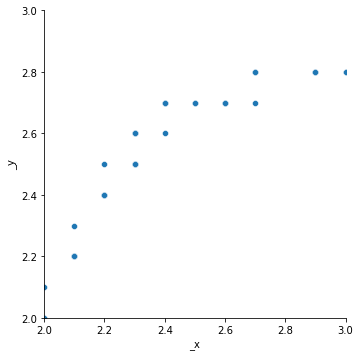

In [43]:
import seaborn as sns

sns.relplot(x = np.array(female), y = np.array(male[:len(female)]))

plt.xlim((2,3))
plt.ylim((2,3))

정규성 검정 수행

In [5]:
from scipy.stats import shapiro


shapiro(female)

(0.8909613490104675, 0.0003754299250431359)

In [6]:
shapiro(male)

(0.9788321852684021, 0.11895745247602463)

feamle은 p-value가 충분히 작아 귀무가설을 기각하고

male은 p-value가 커서 귀무가설을 기각하지 못한다

female은 정규분포를 따른다고 보기 어렵지만 male은 정규분포를 따른다고 할 수 있다

따라서 윌콕슨 순위합 검정을 수행

레퍼런스를 보면 알지만

ranksums()는 동점이 없다고 가정하고

mannwhitneyu()는 동점이 있어도 상관없다

In [21]:
import numpy as np

sum(np.array(female) == np.array(male)[:len(female)]) #서로 같은 값이 몇개 있는가?

3

동점이 존재하므로 mannwhitneyu()함수를 사용

In [22]:
from scipy.stats import mannwhitneyu

mannwhitneyu(female,male)

MannwhitneyuResult(statistic=757.5, pvalue=4.100251117160876e-11)

In [23]:
from scipy.stats import ranksums

ranksums(female,male)

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

p-value가 충분히 작아 귀무가설 H0를 기각한다

고양이 암컷의 몸무게 평균과 수컷의 몸무게 평균이 다르다고 말할 수 있다

두 집단이 정규분포를 따른다고 가정하고 검정을 수행해보자.

먼저 등분산 검정을 수행하면

In [19]:
from scipy.stats import levene

levene(female,male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

P-value가 충분히 작아 귀무가설:두 집단의 분산이 동일하다를 기각한다

ttest_ind()에서 equal_var = False를 주고 t_test를 수행

In [25]:
from scipy.stats import ttest_ind

ttest_ind(female,male,equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

p-value가 충분히 작아 귀무가설:두 집단의 평균이 같다를 기각한다

따라서 수컷 고양이의 몸무게 평균과 암컷 고양이의 몸무게 평균이 다르다고 말할 수 있다

In [26]:
print(female.mean(), male.mean())

2.3595744680851065 2.8999999999999995


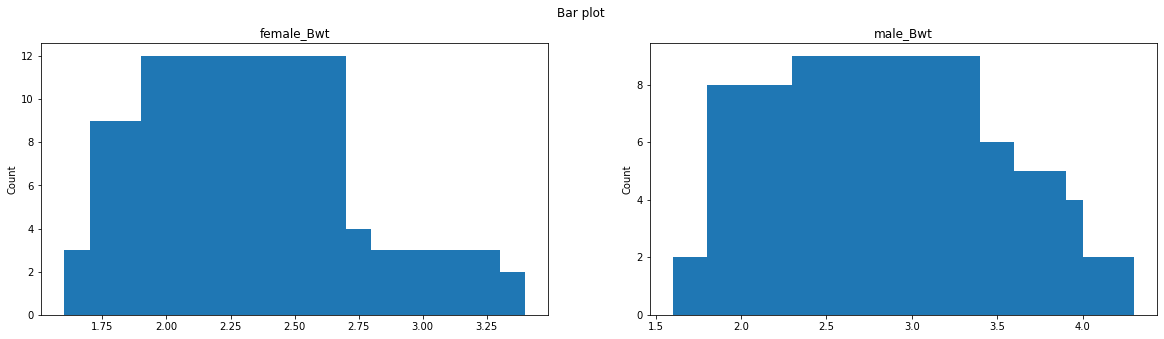

In [27]:
import matplotlib.pyplot as plt

female_Bwt_cnt = pd.value_counts(female.values,sort=False)

male_Bwt_cnt = pd.value_counts(male.values, sort= False)

fig,axs = plt.subplots(1,2,figsize=(20,5))

fig.suptitle('Bar plot')

width = 0.4

axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)

axs[0].set_title('female_Bwt')

axs[0].set_ylabel('Count')

axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)

axs[1].set_title('male_Bwt')

axs[1].set_ylabel('Count')

plt.show()